# Zomato's Restaurant Data Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading and cleaning the dataset for better understanding.
Here we have two data-set of same company, one mentioning all the details of restaurants and other's having differentiation with country codes.

In [2]:
#Command for reading the dataset 1 , and used set option command for scrolling over the data.
X=pd.read_csv('Copy of zomato (1).csv')
pd.set_option("display.max_columns",None)
X

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
Y=pd.read_excel('Copy of Zomato_Country-Code.xlsx')
Y

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [4]:
#Merging both the dataset by Left Merge to make the more processed single dataset.
zomato=pd.merge(X,Y,how="left",on="Country Code")
zomato

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [5]:
#Changed the location of a coloumn from one last to middle.
zomato.insert(3,'Country',zomato.pop('Country'))
zomato

,Restaurant ID,Restaurant Name,Country Code,Country,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Phillipines,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Phillipines,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Phillipines,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Phillipines,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Phillipines,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,Turkey,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,Turkey,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,Turkey,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,Turkey,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [6]:
#checking whether data is cleaned or  not, or if the data consist any Null- values.
zomato.isna().sum() 

Restaurant ID           0
Restaurant Name         0
Country Code            0
Country                 0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
zomato['Cuisines'].value_counts()

North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

In [8]:
#it has found out that Cuisines column consits 9 null values, replaced the null-values with the Mode value in the column.
zomato["Cuisines"]=zomato['Cuisines'].replace({np.nan:"North Indian"})


In [9]:
zomato.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
Country                 0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

zomato.describe(include="object")

# Finding Insights in the Data for more clear understanding
As cleaning and processing of the data is completed, now other task is to find cruisual insights in this dataset for better understanding.

### 1. Which country has the maximum data?

In [10]:
count=zomato['Country'].value_counts().to_frame()
count

,Country
India,8652
United States,434
United Kingdom,80
Brazil,60
UAE,60
South Africa,60
New Zealand,40
Turkey,34
Australia,24
Phillipines,22


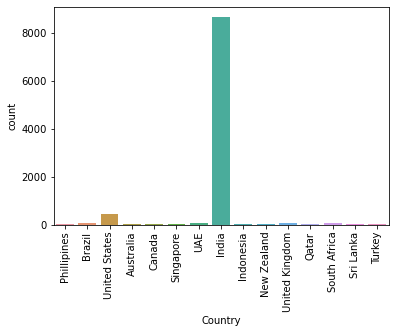

In [11]:
sns.countplot(zomato["Country"]);
plt.xticks(rotation=90)
plt.show()

### 2. Which Restaurants in India has maximum listed outlets (Top 5) data?

In [12]:
z1=zomato[zomato["Country"]=="India"]
y=z1["Restaurant Name"].value_counts().to_frame().head(5).reset_index()
y.columns=["Restaurant Names","Counts"]
y

,Restaurant Names,Counts
0,Cafe Coffee Day,83
1,Domino's Pizza,79
2,Subway,63
3,Green Chick Chop,51
4,McDonald's,48


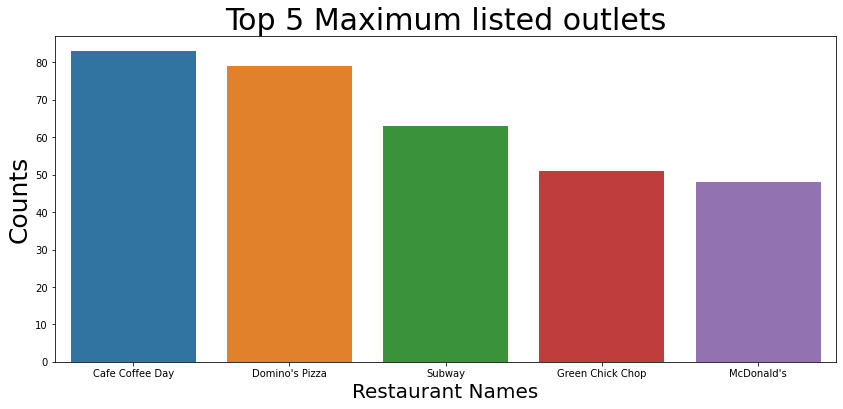

In [13]:
plt.figure(figsize=(14,6))
sns.barplot(y['Restaurant Names'],y["Counts"])
plt.xlabel('Restaurant Names', fontsize=20)
plt.ylabel('Counts', fontsize=25);
plt.title("Top 5 Maximum listed outlets", fontsize=30);


### 3. Which restraunt is having the Highest Cost of Two in Delhi?

In [14]:
z2=zomato[zomato["City"]=="New Delhi"]
z2
a1=z2.groupby(["Average Cost for two"])["Restaurant Name"].max().tail(3).to_frame().reset_index()

In [15]:
a1

,Average Cost for two,Restaurant Name
0,6500,Bukhara - ITC Maurya
1,7000,Tian - Asian Cuisine Studio - ITC Maurya
2,8000,Orient Express - Taj Palace Hotel


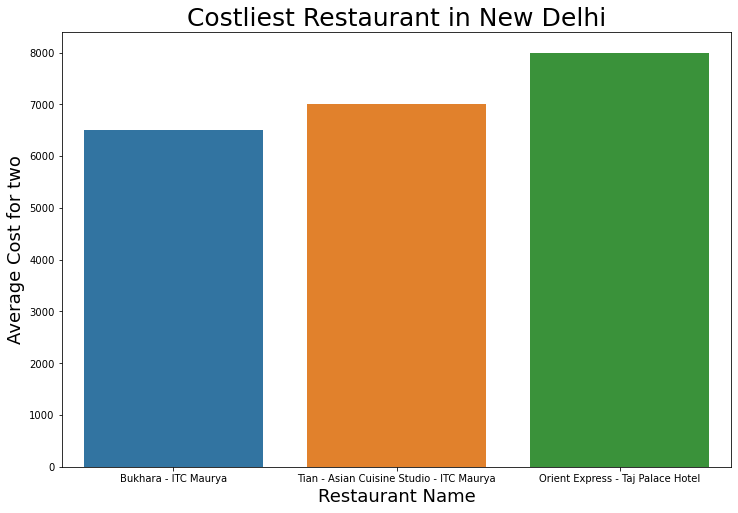

In [16]:
sns.set_style
plt.figure(figsize=(12,8))
sns.barplot(a1["Restaurant Name"],a1["Average Cost for two"])
plt.xlabel('Restaurant Name', fontsize=18)
plt.ylabel('Average Cost for two', fontsize=18)
plt.title("Costliest Restaurant in New Delhi", fontsize=25)
plt.xticks(rotation=0);

### 4. Top 5 most rated restaurant in Saket, New Delhi. 

In [17]:
z3=z2[z2['Locality']=='Saket']
z3

,Restaurant ID,Restaurant Name,Country Code,Country,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
6886,309152,Alam Muradabadi Chicken Biryani,1,India,New Delhi,"Main IGNOU Road, Saket, New Delhi",Saket,"Saket, New Delhi",77.201105,28.508920,"North Indian, Biryani",250,Indian Rupees(Rs.),No,No,No,No,1,3.0,Orange,Average,5
6887,309113,Boheme Bar & Grill,1,India,New Delhi,"G-8, Southern Park Mall, Saket, New Delhi",Saket,"Saket, New Delhi",77.219274,28.527690,"North Indian, Chinese, Italian",1300,Indian Rupees(Rs.),Yes,Yes,No,No,3,3.3,Orange,Average,118
6888,18398598,Budapest Kitchen & Bar,1,India,New Delhi,"Shop 13-17, Gate 3, Garden of Five Senses, Sai...",Saket,"Saket, New Delhi",77.198789,28.513013,"Finger Food, North Indian, Continental, Chines...",1500,Indian Rupees(Rs.),Yes,No,No,No,3,3.0,Orange,Average,4
6889,18303720,Dark House,1,India,New Delhi,"Khasra 276, West End Marg, Saidulajab, Saket, ...",Saket,"Saket, New Delhi",77.198939,28.518201,"Chinese, Italian, Fast Food",400,Indian Rupees(Rs.),No,Yes,No,No,1,2.8,Orange,Average,24
6890,18303716,Henry's Cafe,1,India,New Delhi,"69, Main IGNOU Road, Saket, New Delhi",Saket,"Saket, New Delhi",77.205590,28.515369,"Pizza, North Indian, Continental",700,Indian Rupees(Rs.),No,Yes,No,No,2,3.4,Orange,Average,42
6891,300221,Kathi Zone,1,India,New Delhi,"Near Made Easy Coaching Center, Westend Marg, ...",Saket,"Saket, New Delhi",77.198240,28.517555,Fast Food,200,Indian Rupees(Rs.),No,No,No,No,1,3.3,Orange,Average,20
6892,18203177,Kehar Cafe & Restaurant,1,India,New Delhi,"A-1, Kehar Singh Estate, Behind Saket Metro St...",Saket,"Saket, New Delhi",77.200409,28.519438,"North Indian, Mughlai, Chinese",600,Indian Rupees(Rs.),No,No,No,No,2,2.8,Orange,Average,16
6893,308992,Kumaon Dhaba & Service,1,India,New Delhi,"Shop 11, IGNOU Road, Saidulajab, Saket, New Delhi",Saket,"Saket, New Delhi",77.206380,28.519018,North Indian,100,Indian Rupees(Rs.),No,No,No,No,1,3.0,Orange,Average,8
6894,18368005,Let'z Eat,1,India,New Delhi,"Gate 1, Opposite Freedom Fighter Colony, Saket...",Saket,"Saket, New Delhi",77.202174,28.510419,"North Indian, Mughlai, Chinese, Fast Food",600,Indian Rupees(Rs.),No,Yes,No,No,2,2.7,Orange,Average,11
6895,311517,Lite Eat Cafe,1,India,New Delhi,"West Avenue Marg, Saidulajab, Saket, New Delhi",Saket,"Saket, New Delhi",77.198219,28.517484,Fast Food,300,Indian Rupees(Rs.),No,No,No,No,1,3.0,Orange,Average,4


In [18]:
a2=z3[['Restaurant Name','Aggregate rating']].sort_values(by='Aggregate rating',ascending=False).reset_index()
a2.drop('index', axis=1, inplace= True)
b1=a2.head(5)
b1

,Restaurant Name,Aggregate rating
0,Blue Tokai Coffee Roasters,4.4
1,Ice Pan Creamery,4.2
2,Rose Cafe,4.1
3,All About Food,3.9
4,The Junkyard Cafe,3.8


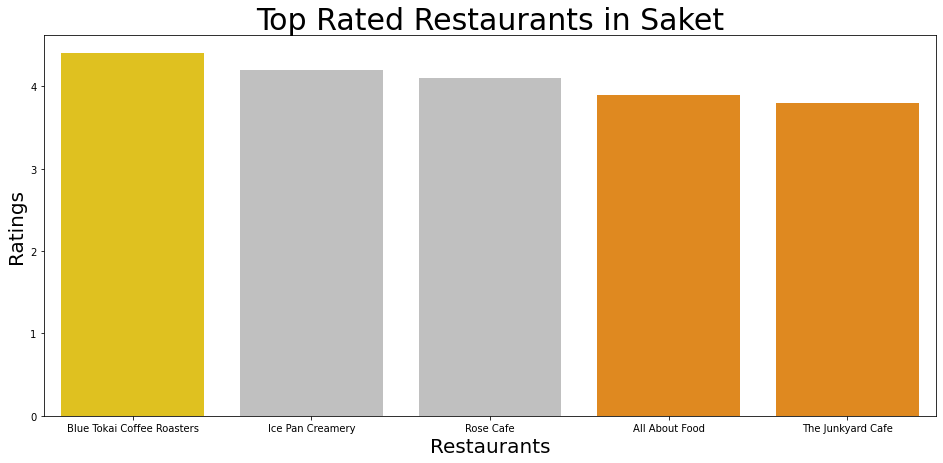

In [19]:
plt.figure(figsize=(16,7))
colors=['Gold','Silver','Silver','DarkOrange','DarkOrange']
sns.barplot(b1["Restaurant Name"],b1["Aggregate rating"], palette=colors)
plt.ylabel("Ratings",fontsize=20)
plt.xlabel("Restaurants", fontsize=20)
plt.title("Top Rated Restaurants in Saket", fontsize=30);

### 5. Which Cuisine have the Highest cost of Two in Delhi and London?

In [20]:
z4=zomato[zomato["City"]=="London"]
a3=z4[["Cuisines","Average Cost for two","Currency"]].sort_values(by="Average Cost for two",ascending=False).head(5).reset_index()
a3.drop("index",axis=1,inplace=True)
a3

,Cuisines,Average Cost for two,Currency
0,French,230,Pounds(Œ£)
1,"Chinese, Dim Sum",120,Pounds(Œ£)
2,"British, Contemporary",100,Pounds(Œ£)
3,"Japanese, Sushi",100,Pounds(Œ£)
4,"Chinese, Dim Sum",90,Pounds(Œ£)


In [21]:
z2=zomato[zomato["City"]=="New Delhi"]
a4=z2[["Cuisines","Average Cost for two","Currency"]].sort_values(by="Average Cost for two",ascending=False).head(5).reset_index()
a4.drop("index",axis=1,inplace=True)
a4

,Cuisines,Average Cost for two,Currency
0,European,8000,Indian Rupees(Rs.)
1,"Asian, Japanese, Korean, Thai, Chinese",7000,Indian Rupees(Rs.)
2,North Indian,6500,Indian Rupees(Rs.)
3,"Malaysian, Thai, Kerala, Vietnamese, Sri Lankan",6000,Indian Rupees(Rs.)
4,"European, Continental",6000,Indian Rupees(Rs.)


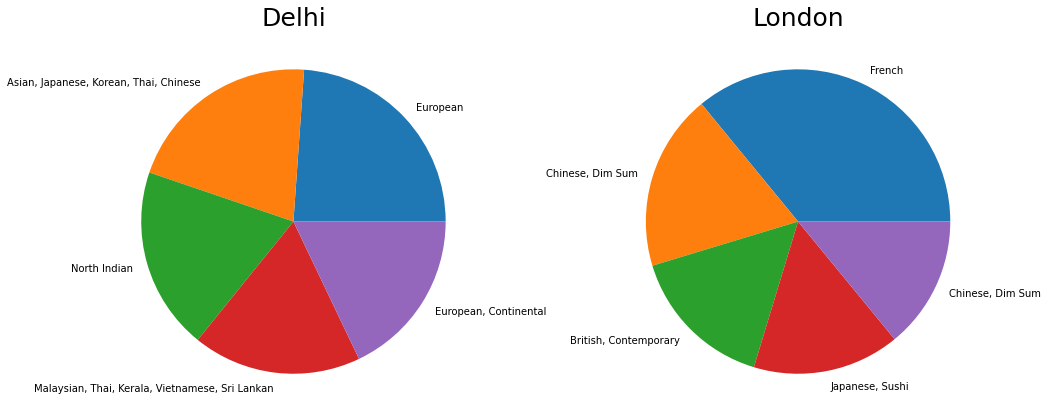

In [22]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.title("Delhi", fontsize=25)
plt.pie(x="Average Cost for two", data=a4, labels="Cuisines")
plt.subplot(1,2,2)
plt.title("London",fontsize=25)
plt.pie(x="Average Cost for two", data=a3, labels="Cuisines")
plt.subplots_adjust(wspace=.3);

### 6. Which Cities in India have Online delivery options and got the most votes?

In [23]:
b1=z1[z1["Has Online delivery"]=="Yes"]
b2=b1.groupby(['City'])["Votes"].max().reset_index()
b2

,City,Votes
0,Ahmedabad,1138
1,Bangalore,9667
2,Chandigarh,970
3,Chennai,1820
4,Coimbatore,274
5,Faridabad,508
6,Ghaziabad,327
7,Gurgaon,1887
8,Hyderabad,3374
9,Jaipur,1469


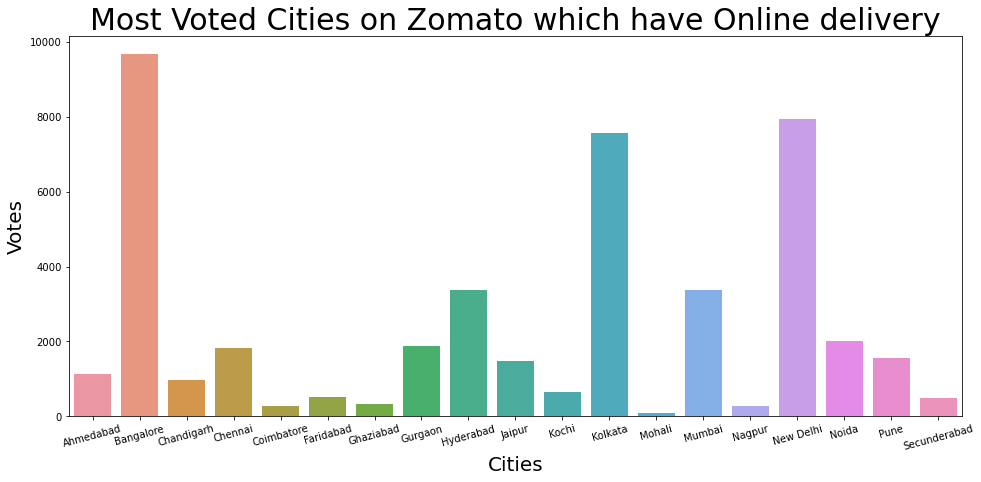

In [24]:
plt.figure(figsize=(16,7))
sns.barplot(x=b2["City"], y=b2["Votes"])
plt.ylabel("Votes",fontsize=20)
plt.xlabel("Cities", fontsize=20)
plt.title("Most Voted Cities on Zomato which have Online delivery", fontsize=30)
plt.xticks(rotation=15);

### 7. What is the Most rating given by the customer on Zomato?

In [25]:
c1=zomato.groupby(['Aggregate rating','Rating text']).size().reset_index().rename(columns={0:"Rating count"})
c1=c1.drop(0).reset_index(drop=True)
c1

,Aggregate rating,Rating text,Rating count
0,1.8,Poor,1
1,1.9,Poor,2
2,2.0,Poor,7
3,2.1,Poor,15
4,2.2,Poor,27
5,2.3,Poor,47
6,2.4,Poor,87
7,2.5,Average,110
8,2.6,Average,191
9,2.7,Average,250


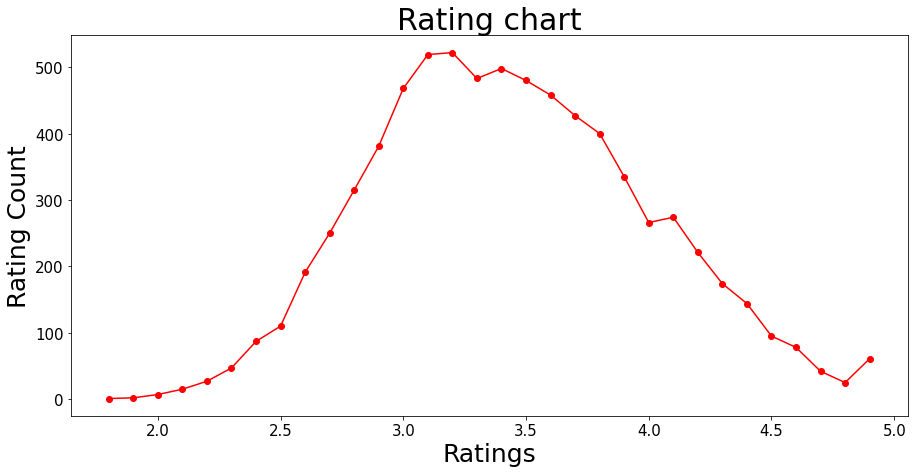

In [26]:
plt.figure(figsize=[15,7])
plt.plot(c1["Aggregate rating"],c1["Rating count"],color="red" ,marker="o");
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Ratings",fontsize=25)
plt.ylabel("Rating Count",fontsize=25)
plt.title("Rating chart",fontsize=30);

### 8. On the basis of Cost for Two, find the Cost for one.


In [27]:
zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'Country', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [28]:
l=[]
for i in zomato['Average Cost for two']:
    l.append(i//2)
zomato['Average Cost for one']=pd.Series(l)
zomato.insert(13,"Average Cost for one", zomato.pop("Average Cost for one"))


In [29]:
zomato

,Restaurant ID,Restaurant Name,Country Code,Country,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Average Cost for one,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Phillipines,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),550,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Phillipines,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),600,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Phillipines,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),2000,Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Phillipines,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),750,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Phillipines,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),750,Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,Turkey,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),40,No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,Turkey,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),52,No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,Turkey,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),85,No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,Turkey,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),60,No,No,No,No,4,4.0,Green,Very Good,901
